In [1]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# convering reviews from obj to int 
reviews = [i for i in df['Reviews']]

def convert_review_to_float(rev_list):
    convert_list =[]
    for i in rev_list:
        if 'M' in i :
            i = i.replace('M','')
            i = float(i) * 1000000
        convert_list.append(i)
    return convert_list 


df['Reviews'] = convert_review_to_float(reviews)
df['Reviews'] = df['Reviews'].astype(float)

In [6]:
# converting install to float
install = [i for i in df['Installs']]

def convert_install_to_float(install_list):
    new_list = []
    for j in install_list :
        if ',' in j :
            j=j.replace(',','')
        if '+' in j :
            j = j.replace('+','')
        if 'Free' in j :
            j = j.replace('Free','0')
        j =int(j) 
        new_list.append(j)
    return new_list
    
df['Installs'] = convert_install_to_float(install)
df['Installs'] = df['Installs'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [8]:
rating_median = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(rating_median)

In [9]:
type_mode  = df['Type'].mode()

In [10]:
df['Type'] = df['Type'].fillna(type_mode[0])

In [11]:
content_mode = df['Content Rating'].mode()

In [12]:
df['Content Rating']= df['Content Rating'].fillna(content_mode[0])

In [13]:
cur_ver_mode = df['Current Ver'].mode()

In [14]:
df['Current Ver'] = df['Current Ver'].fillna(cur_ver_mode[0])

In [15]:
and_ver_mode = df['Android Ver'].mode()

In [16]:
df['Android Ver'] = df['Android Ver'].fillna(and_ver_mode[0])

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
# Q1 what are the unique categories in the given data set ? 
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [19]:
# Q2 How many number of apps in each category ? 
df.groupby(['Category'])['App'].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

<Axes: title={'center': 'Number of avaible Apps '}, xlabel='count', ylabel='Category'>

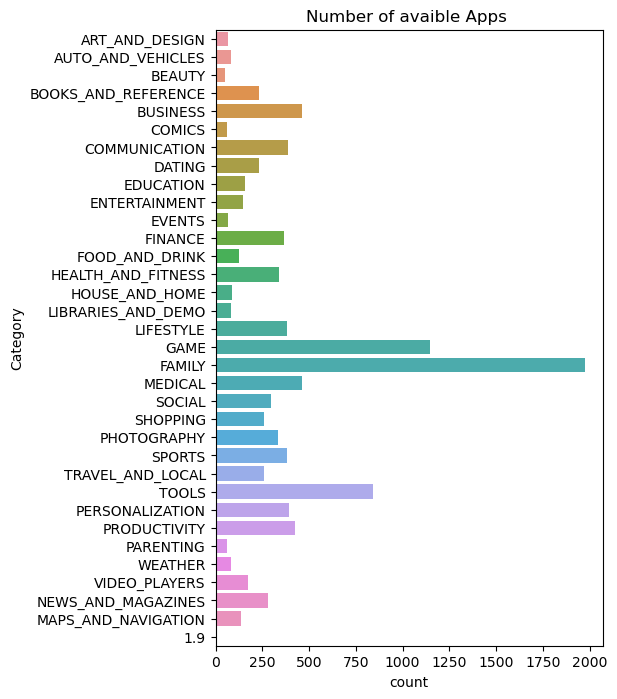

In [20]:
# Q3 count of available apps based on category?
plt.figure(figsize=(5,8))
plt.title('Number of avaible Apps ')
sb.countplot(data=df ,y='Category')

In [21]:
# There are more apps in the family category 

<Axes: title={'center': 'Rating Distribution'}, xlabel='Rating', ylabel='count'>

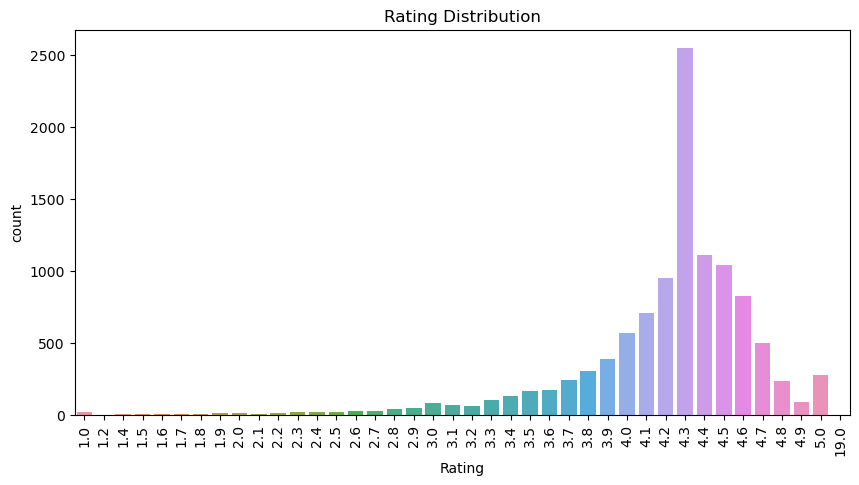

In [22]:
# Q4 Display the Rating Distribution
plt.figure(figsize=(10,5))
plt.title('Rating Distribution')
plt.xticks(rotation=90)
sb.countplot(data=df,x='Rating')

<Axes: title={'center': 'Count of Free vs Paid'}, xlabel='Type', ylabel='count'>

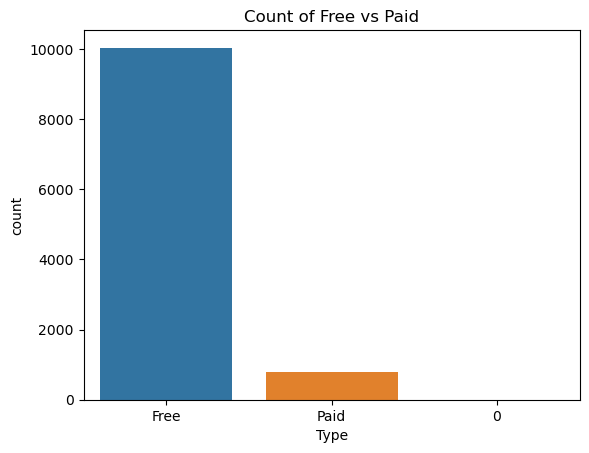

In [23]:
# Q5 count the Types of Apps available 
plt.title('Count of Free vs Paid')
sb.countplot(data=df,x='Type')

In [24]:
#Q6 Display the avg rating of each category ?
GRP = df.groupby('Category')['Rating'].mean()
GRP

Category
1.9                    19.000000
ART_AND_DESIGN          4.355385
AUTO_AND_VEHICLES       4.205882
BEAUTY                  4.283019
BOOKS_AND_REFERENCE     4.335498
BUSINESS                4.182391
COMICS                  4.160000
COMMUNICATION           4.180103
DATING                  4.025641
EDUCATION               4.388462
ENTERTAINMENT           4.126174
EVENTS                  4.395313
FAMILY                  4.204564
FINANCE                 4.151639
FOOD_AND_DRINK          4.185827
GAME                    4.286888
HEALTH_AND_FITNESS      4.280059
HOUSE_AND_HOME          4.211364
LIBRARIES_AND_DEMO      4.207059
LIFESTYLE               4.131414
MAPS_AND_NAVIGATION     4.075182
MEDICAL                 4.216199
NEWS_AND_MAGAZINES      4.161837
PARENTING               4.300000
PERSONALIZATION         4.328827
PHOTOGRAPHY             4.197910
PRODUCTIVITY            4.226651
SHOPPING                4.263077
SOCIAL                  4.261017
SPORTS                  4.236458
T

<Axes: xlabel='Rating'>

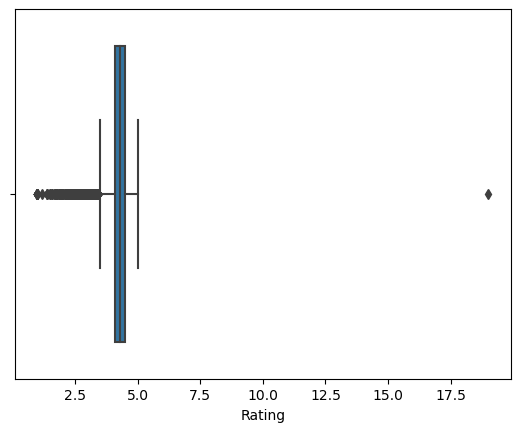

In [25]:
#Q7 Find out there are any outliers in rating category 
sb.boxplot(data=df,x='Rating')

In [26]:
# Q8 Display the app with highest rating . 
highest_rating = df.sort_values(by='Rating',ascending=False)
highest_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,"1,000+",0.0,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up
9503,Pyaar Ek Dhoka,FAMILY,5.0,18.0,1.3M,50.0,Free,0,Everyone,Casual,"February 13, 2018",1.0,4.3 and up
9282,EF Events,EVENTS,5.0,7.0,4.4M,100.0,Free,0,Teen,Events,"October 5, 2017",Varies with device,Varies with device
4477,Android P Style Icon Pack,PERSONALIZATION,5.0,1.0,60M,100.0,Paid,$0.99,Everyone,Personalization,"June 16, 2018",1.0,4.1 and up
8159,CZ Kompas,TOOLS,5.0,2.0,3.5M,10.0,Free,0,Everyone,Tools,"July 9, 2018",1.1,4.0 and up


In [27]:
# Q9 Display the count of apps based on types
Type = df.groupby('Type')['Category'].count()
Type

Type
0           1
Free    10040
Paid      800
Name: Category, dtype: int64

In [28]:
a= df[df['Category']=='FAMILY']
Type = a.groupby('Android Ver')['Category'].count().sort_values(ascending=False)
Type

Android Ver
4.1 and up            516
4.0.3 and up          307
4.0 and up            290
2.3 and up            188
4.4 and up            150
Varies with device     83
2.3.3 and up           75
4.2 and up             72
2.2 and up             59
3.0 and up             56
5.0 and up             51
4.3 and up             41
2.1 and up             26
1.6 and up             15
7.0 and up             10
3.2 and up              7
2.0 and up              7
5.1 and up              6
2.0.1 and up            5
3.1 and up              3
6.0 and up              3
1.5 and up              2
Name: Category, dtype: int64

In [29]:
# Q10 What are the top 3  Android versions among the apps in the dataset?
ver =df.groupby('Android Ver')['Category'].count()
ver.sort_values(ascending=False)[:3]

Android Ver
4.1 and up      2454
4.0.3 and up    1501
4.0 and up      1375
Name: Category, dtype: int64

In [30]:
# Q11 Find out the relationship between reviews and rating columns 
rel = df['Reviews'].corr(df['Rating'])
rel

0.06294766307628154

<Axes: xlabel='Content Rating', ylabel='count'>

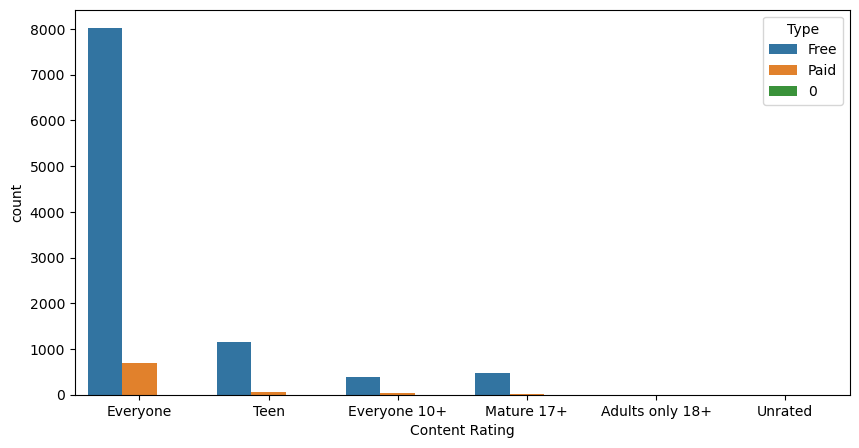

In [31]:
# Q12. Display the count of content rating over each type ? 
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='Content Rating',hue='Type')

<Axes: xlabel='count', ylabel='Category'>

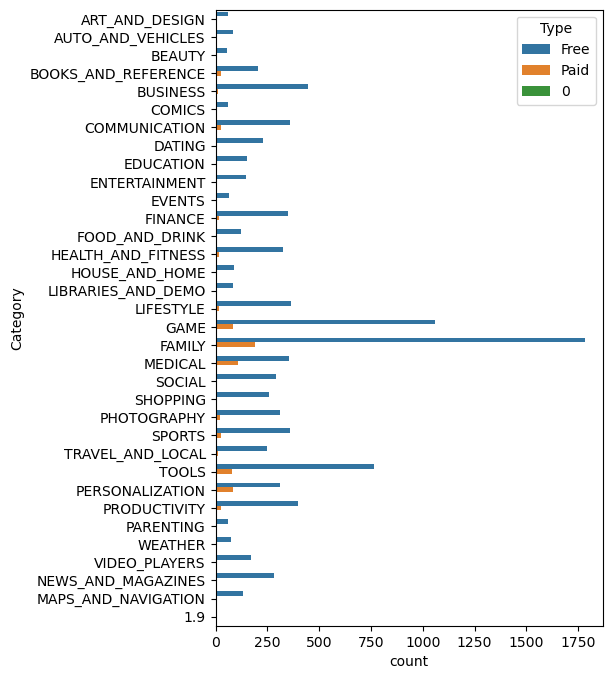

In [32]:
# Q13 Display the count categories for each type  ?

plt.figure(figsize=(5,8))
sb.countplot(data=df,y='Category',hue='Type')

In [33]:
apps = df.groupby(['Category'])['App'].count()

In [34]:
apps

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64